# 1. test

In [1]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

def display_gray_image(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()


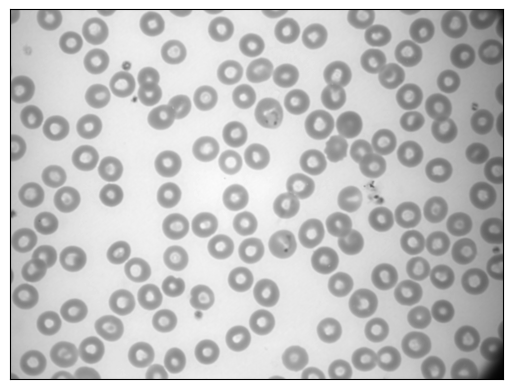

In [2]:
import cv2

imga = cv2.imread('malaria/rawdataA/002f20ad-2ace-499c-9335-c9080bc3e6b5.png', cv2.IMREAD_GRAYSCALE)
imgb = cv2.imread('malaria/rawdataB/1703121298-0006-R.jpg', cv2.IMREAD_GRAYSCALE)
imgb2 = cv2.resize( imgb, (1600,1200) )
display_gray_image(imgb2)

In [2]:
imga.shape, imgb.shape, imgb2.shape

NameError: name 'imga' is not defined

# 2. 批量转换

In [3]:
import os
from tqdm import *



def color_image_to_gray_image_png_and_resolution_modify_batch(src_dir, dst_dir):
    # create destination directory
    if os.path.exists(dst_dir)==False:
        os.makedirs(dst_dir)

    src_image_path_list = []
    for f1 in os.listdir(src_dir):
        f2 = os.path.join( src_dir,f1 )
        src_image_path_list.append(f2)

    print('image count = {0}'.format(len( src_image_path_list )))

    reshape_image_count = 0
    for f in tqdm(src_image_path_list):
        # read file as gray
        img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        # all resolution to 1200x1600 
        if img.shape!=(1200, 1600):
            img = cv2.resize(img, (1600,1200))
            reshape_image_count+=1
        # save as new image
        filename = os.path.basename(f)
        tokens = filename.split('.')
        tokens[-1] = 'png'
        filename = '.'.join(tokens)
        p = os.path.join(dst_dir, filename)
        cv2.imwrite(p, img)

    print('resolution modified image count is {0}'.format(reshape_image_count))

In [19]:
src_dir_a  = 'contrast_then_hist/'
dst_dir_a  = 'contrast_then_hist_g/'
color_image_to_gray_image_png_and_resolution_modify_batch(src_dir_a, dst_dir_a)

image count = 1328


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1328/1328 [01:47<00:00, 12.31it/s]

resolution modified image count is 120


In [5]:
import cv2

In [7]:
src_dir_a  = 'median/'
dst_dir_a  = 'median_g/'
color_image_to_gray_image_png_and_resolution_modify_batch(src_dir_a, dst_dir_a)

image count = 1328


100%|██████████████████████████████████████████████████████████████████████████████| 1328/1328 [01:18<00:00, 16.91it/s]

resolution modified image count is 120


In [20]:
src_dir_a  = 'malaria/rawdataB/'
dst_dir_a  = 'malaria/graydataB/'
color_image_to_gray_image_png_and_resolution_modify_batch(src_dir_a, dst_dir_a)

image count = 40


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 12.06it/s]

resolution modified image count is 40
